<a href="https://colab.research.google.com/github/horsinnaround/Thesis---a-two-layer-power-network/blob/main/thesis_week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
%pip install pandapower
import pandapower as pp
import networkx as nx
import pandapower.networks as pn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandapower.topology as top
# import networkx as nx
from pandapower import plotting
from pandapower.plotting import simple_plot, pf_res_plotly,simple_plotly
import random as rn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

In [120]:
Net = pn.case30()

In [6]:
# Net.gen['slack_weight'] = [0,0.1]
# Net.gen['slack'] = [False,True]


In [133]:
Net.gen

,name,bus,p_mw,vm_pu,sn_mva,min_q_mvar,max_q_mvar,scaling,slack,in_service,slack_weight,type,controllable,max_p_mw,min_p_mw
0,None,1,60.97,1.0,NaN,-20.0,60.0,1.0,False,True,0.0,None,True,80.0,0.0
1,None,21,21.59,1.0,NaN,-15.0,62.5,1.0,False,True,0.0,None,True,50.0,0.0
2,None,26,26.91,1.0,NaN,-15.0,48.7,1.0,False,True,0.0,None,True,55.0,0.0
3,None,22,19.20,1.0,NaN,-10.0,40.0,1.0,False,True,0.0,None,True,30.0,0.0
4,None,12,37.00,1.0,NaN,-15.0,44.7,1.0,False,True,0.0,None,True,40.0,0.0


In [91]:
Net.gen['slack'].iloc[0] = True
Net.gen['slack_weight'].iloc[0] = 1


In [121]:
# pp.drop_buses(Net, [1], drop_elements=True)
k = list(Net.gen['bus'])
k

[1, 21, 26, 22, 12]

In [125]:
Net.gen['slack'].iloc[1]

False

In [76]:
b = len(Net.line)

In [138]:
np.random.randint(1, high=b-3, size=2, dtype=int)

array([33, 22])

In [182]:
lem = [np.random.randint(1, high=b-3, size=3, dtype=int) for _ in range(200)]

None
0


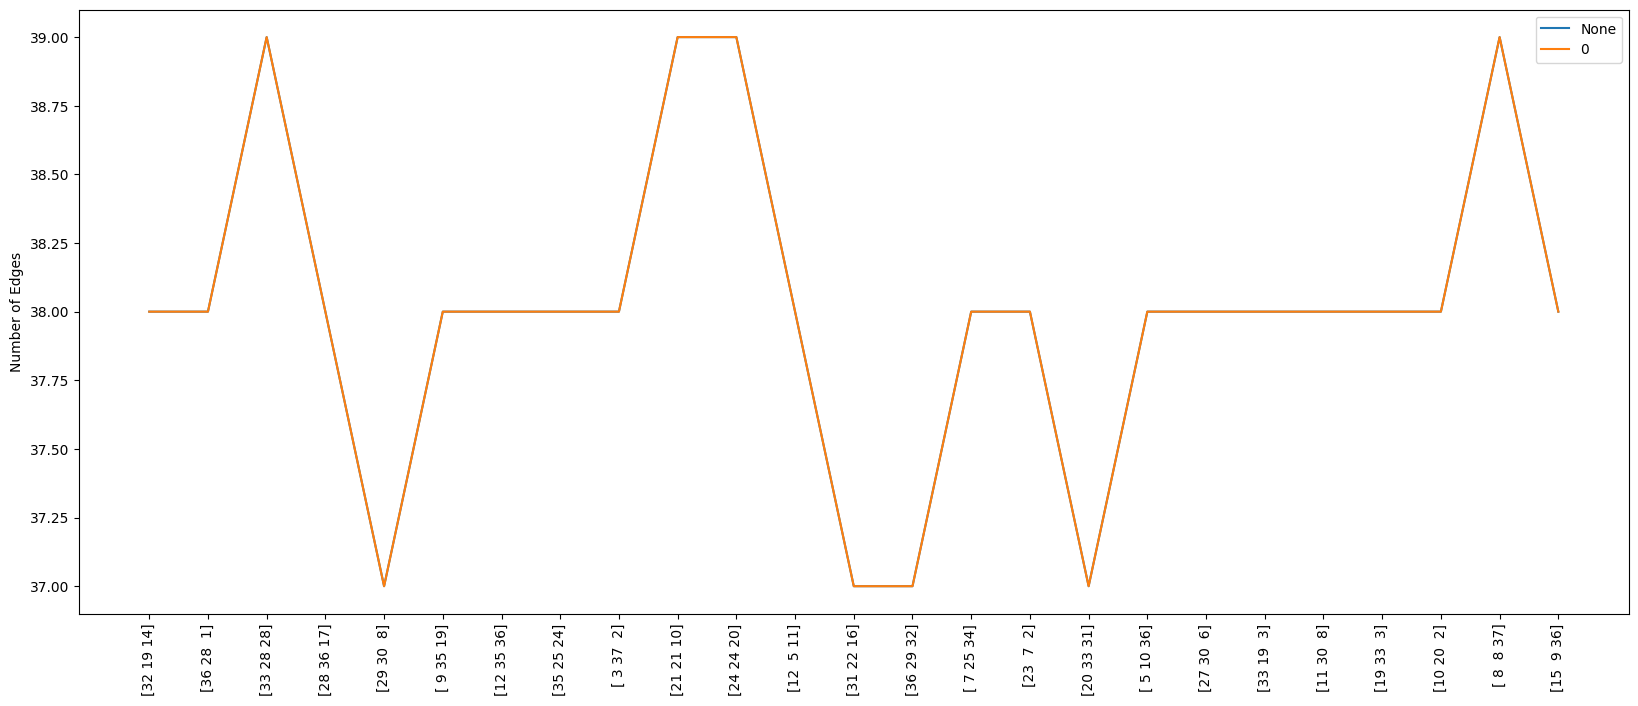

None
1


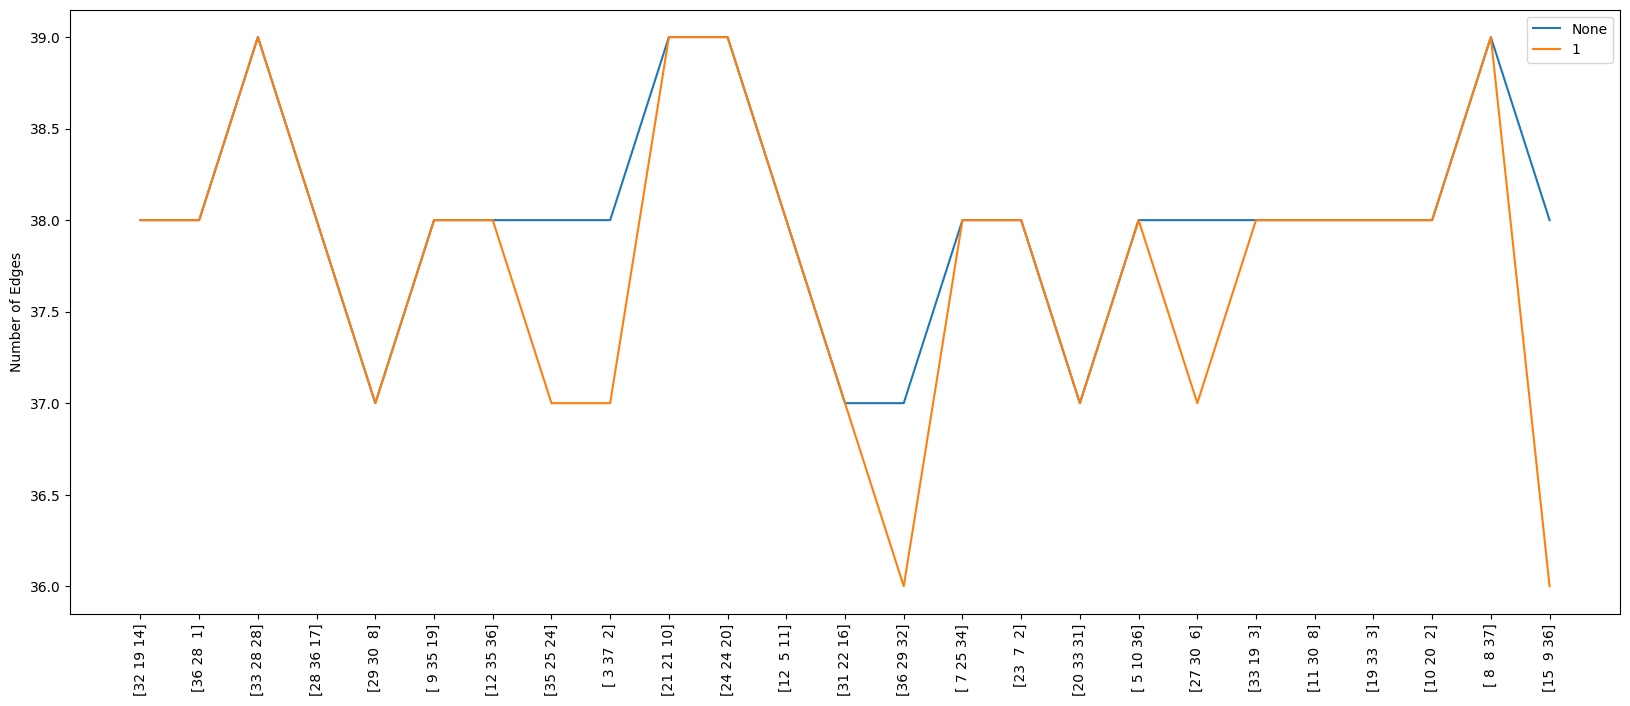

None
2


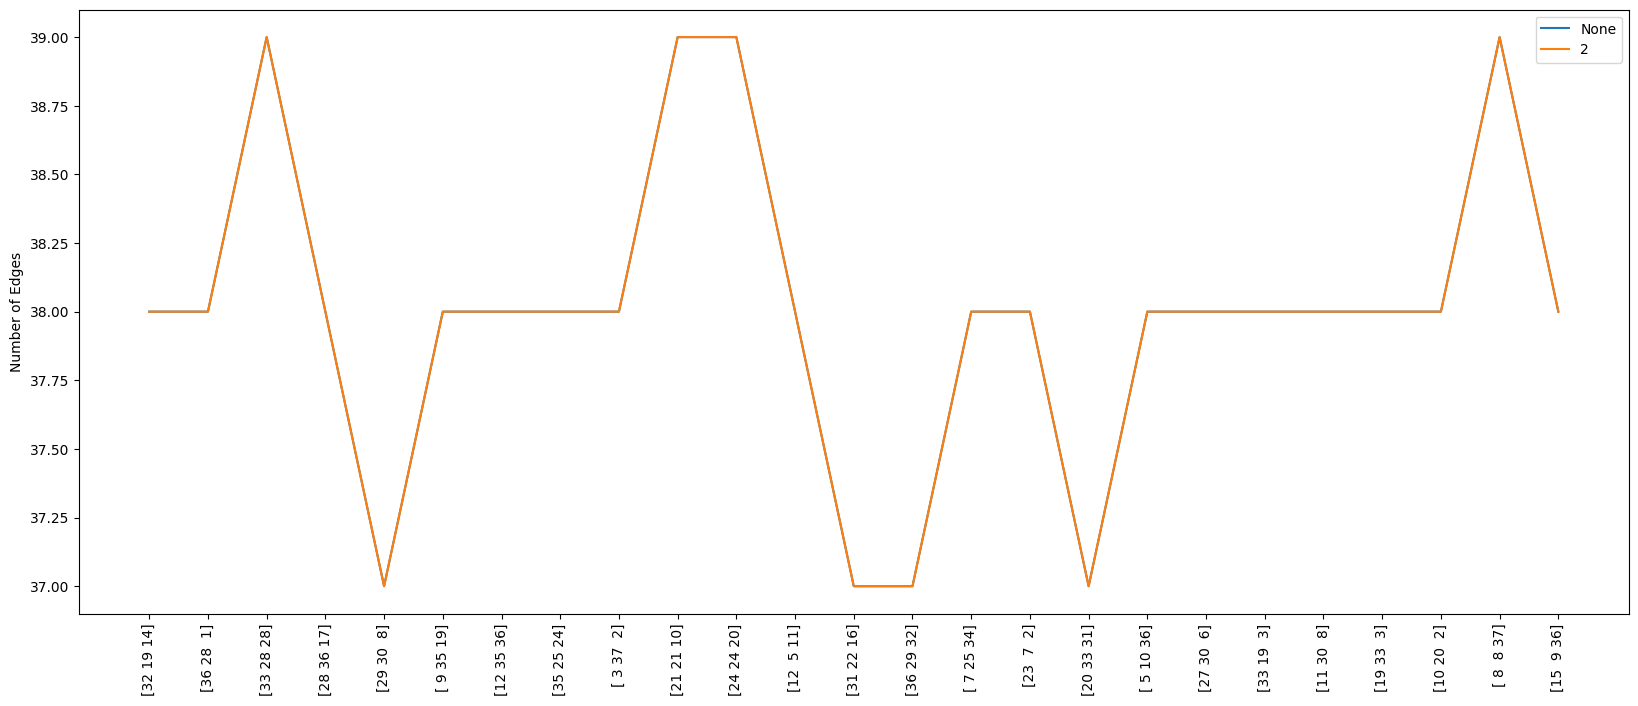

None
3


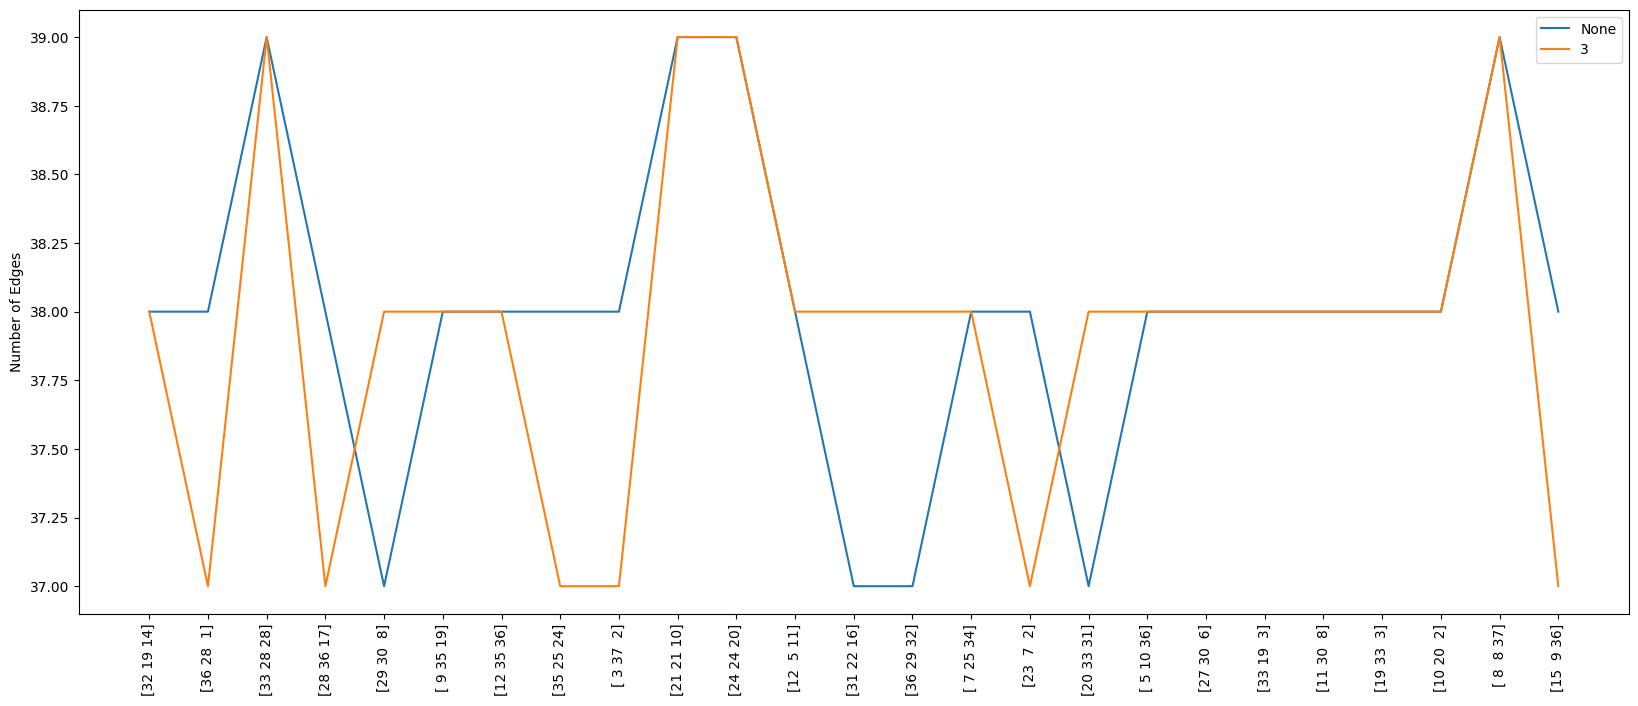

None
4


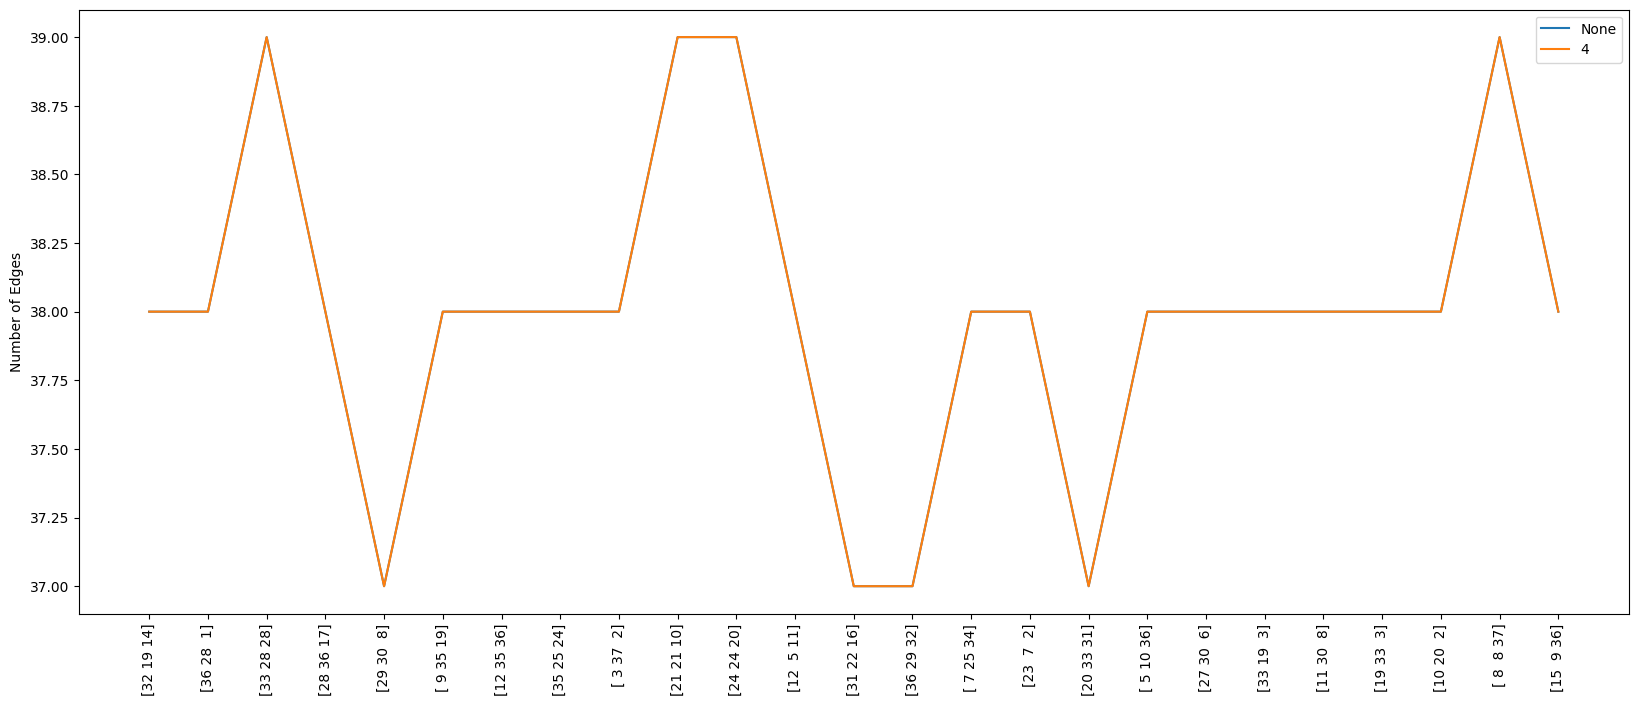

In [183]:
for v in [0,1,2,3,4]:
    plt.figure(figsize=(20,8))
    c = [None,v]
    for j in c:
        print(j)
        Net = Net = pn.case30()
        b = len(Net.line)
        name = []
        lens = []
        for i in range(175,200):
            if j != None:
                Net.gen['slack'].loc[j] = True
                Net.gen['slack_weight'].loc[j] = 1
            # jk = np.random.randint(1, high=b-3, size=2, dtype=int)
            pp.drop_lines(Net,lem[i])
            pp.rundcpp(net=Net)
            drop_lines = pp.overloaded_lines(Net)
            # print(drop_lines)
            pp.drop_lines(Net,drop_lines)
            pp.drop_out_of_service_elements(Net)
            pp.drop_inactive_elements(Net, respect_switches=True)
            # print(i+1,i+2,i+3,len(Net.line))
            name.append(f'{lem[i]}')
            lens.append(len(Net.line))
            Net = Net = pn.case30()
        plt.plot(name,lens,label=f'{j}')
        plt.xticks(ticks=np.arange(len(name)), labels=name);
        plt.xticks(rotation=90)
    plt.legend()
    plt.ylabel("Number of Edges")
    plt.savefig(f'/content/temp-plot_{c}.png',bbox_inches='tight')
    plt.show()

In [155]:
Net.ext_grid

,name,bus,vm_pu,va_degree,slack_weight,in_service,max_p_mw,min_p_mw,max_q_mvar,min_q_mvar
0,None,0,1.0,0.0,1.0,True,80.0,0.0,150.0,-20.0


In [164]:
lem = [np.random.randint(1, high=29, size=2, dtype=int) for _ in range(200)]

None
0


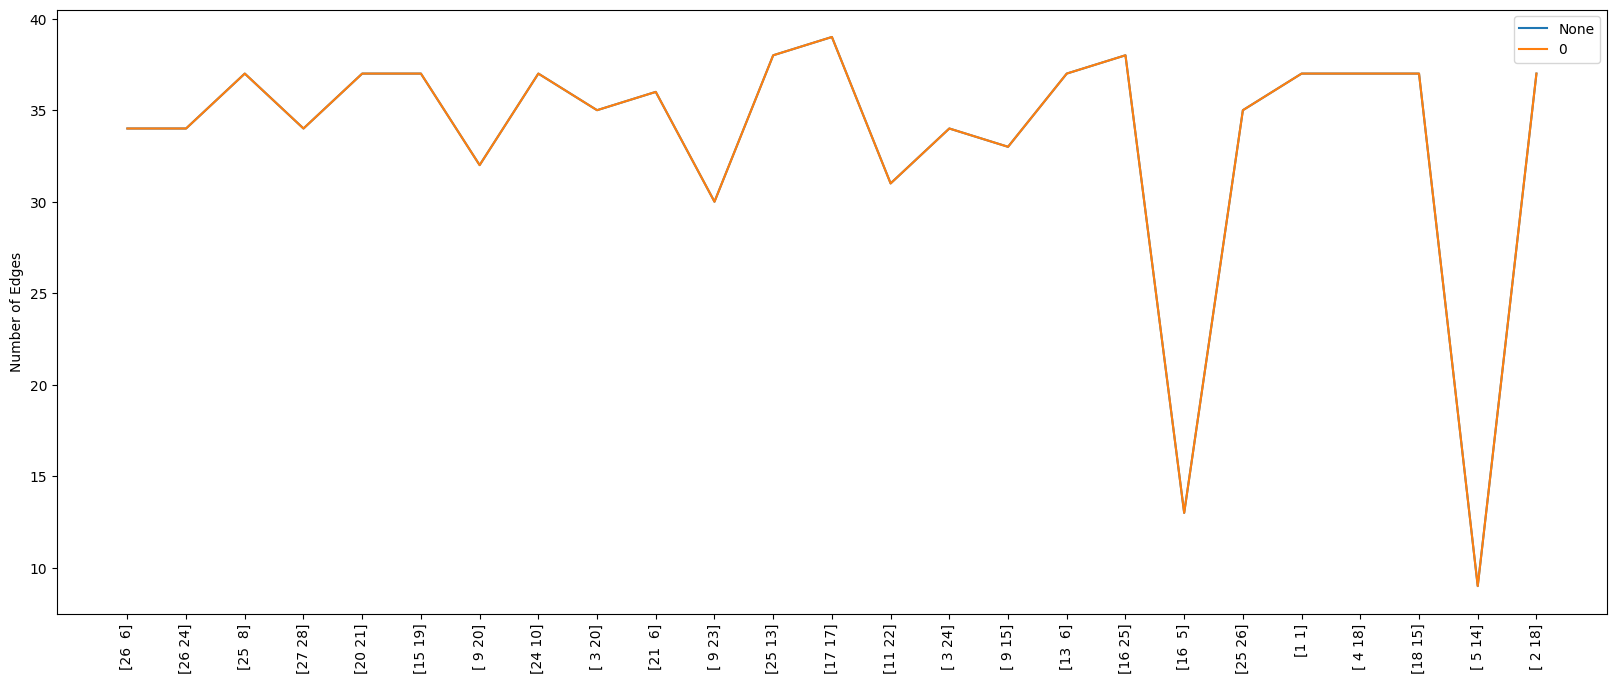

None
1


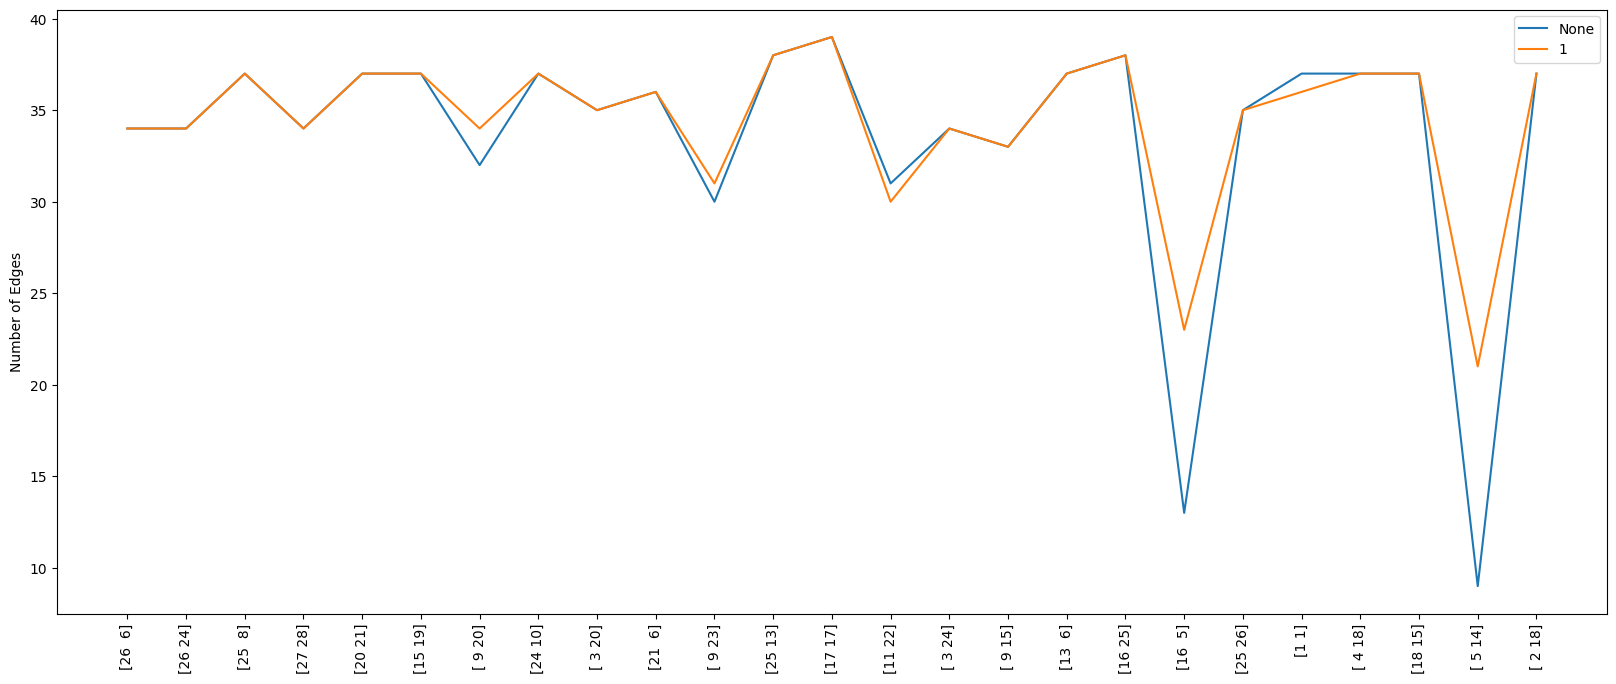

None
2


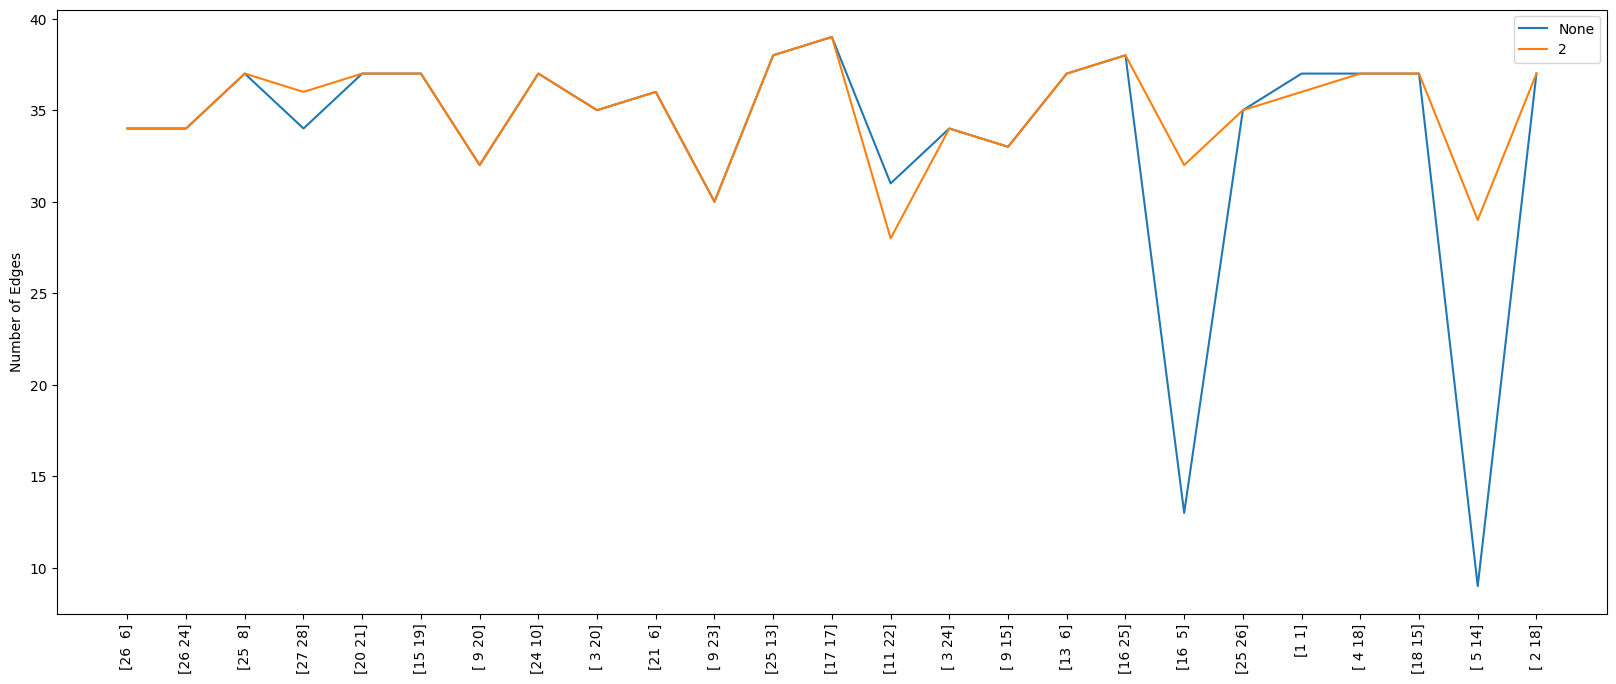

None
3


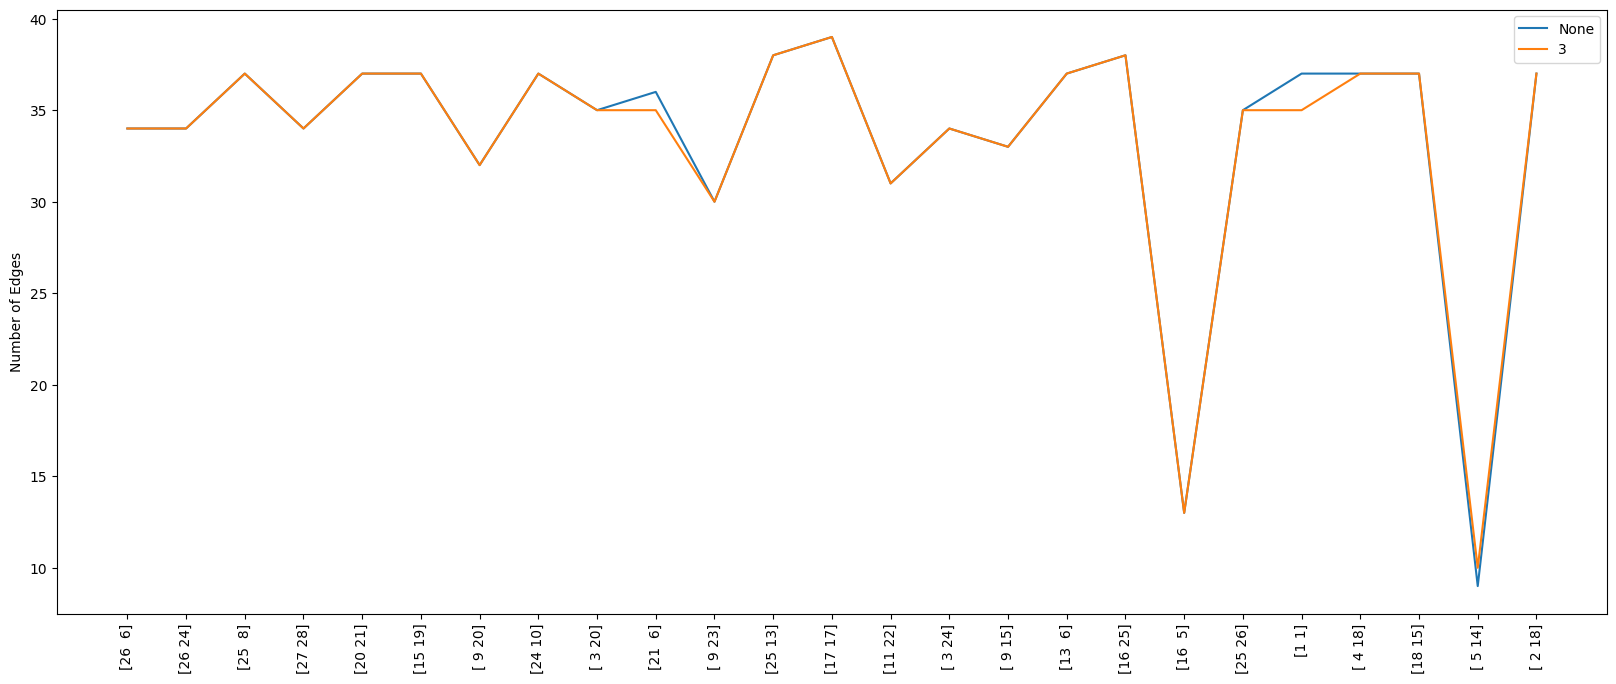

None
4


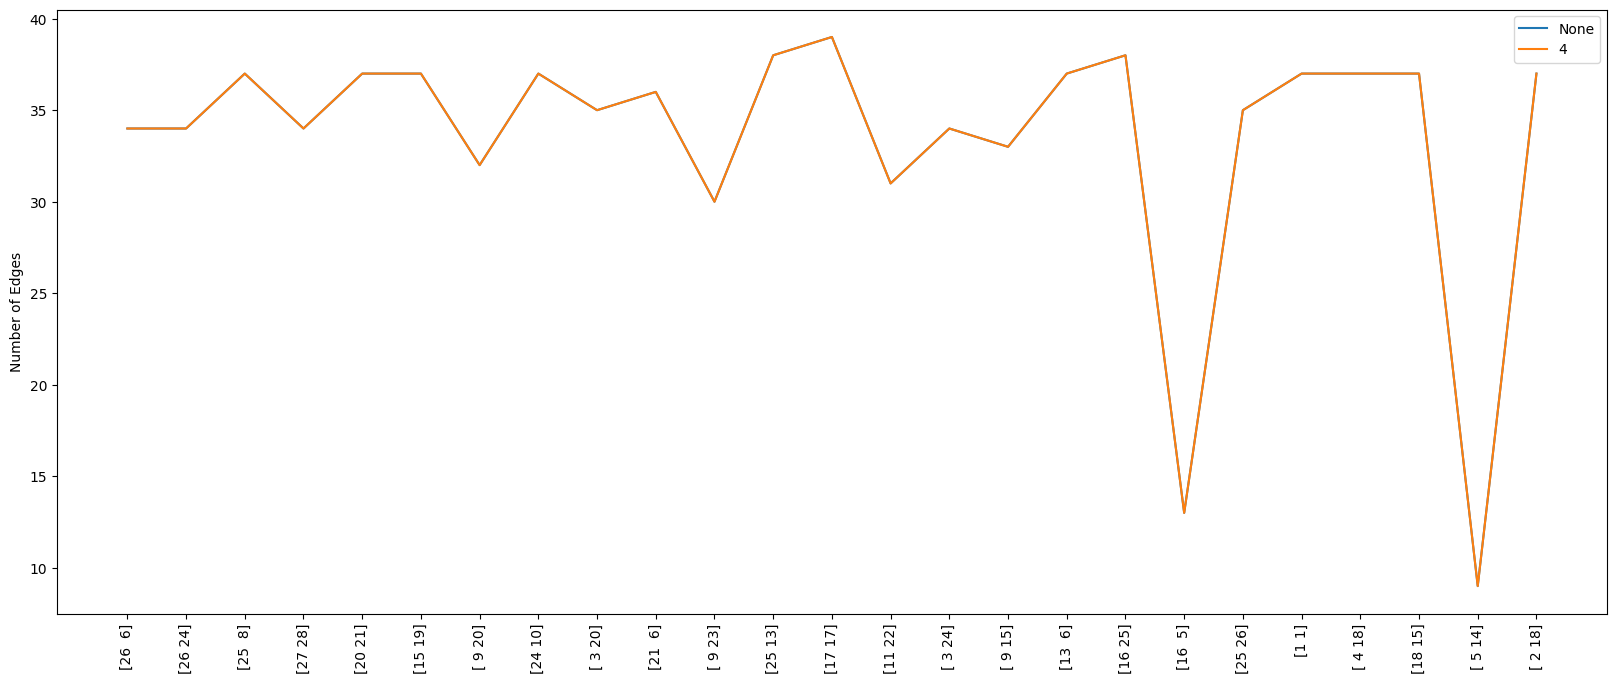

In [176]:
for v in [0,1,2,3,4]:
    plt.figure(figsize=(20,8))
    c = [None,v]
    for j in c:
        print(j)
        Net = Net = pn.case30()
        b = len(Net.line)
        name = []
        lens = []
        for i in range(25):
            if j != None:
                Net.gen['slack'].loc[j] = True
                Net.gen['slack_weight'].loc[j] = 1
            # jk = np.random.randint(1, high=b-3, size=2, dtype=int)
            # pp.drop_lines(Net,lem[i])
            pp.drop_buses(Net, lem[i], drop_elements=True)
            pp.rundcpp(net=Net)
            drop_lines = pp.overloaded_lines(Net)
            # print(drop_lines)
            pp.drop_lines(Net,drop_lines)
            pp.drop_out_of_service_elements(Net)
            pp.drop_inactive_elements(Net, respect_switches=True)
            # print(i+1,i+2,i+3,len(Net.line))
            name.append(f'{lem[i]}')
            lens.append(len(Net.line))
            Net = Net = pn.case30()
        plt.plot(name,lens,label=f'{j}')
        plt.xticks(ticks=np.arange(len(name)), labels=name);
        plt.xticks(rotation=90)
    plt.legend()
    plt.ylabel("Number of Edges")
    plt.savefig(f'/content/temp-plot2{c}.png',bbox_inches='tight')
    plt.show()

In [73]:
pp.rundcpp(net=Net)
drop_lines = pp.overloaded_lines(Net)

In [63]:
pp.drop_lines(Net,drop_lines)

In [64]:
pp.drop_out_of_service_elements(Net)

In [65]:
pp.drop_inactive_elements(Net, respect_switches=True)

In [74]:
pf_res_plotly(Net)